# Implementing a Decision Tree with scikit-learn

Dr J Rogel-Salazar

[j.rogel.datascience@gmail.com](mailto:j.rogel.datascience@gmail.com)

Let us import some librarioes that we will use during the practice

In [1]:
%pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


We can read the data with the help of pandas using the `read_csv` method

In [2]:
iris_data = pd.read_csv('./data/iris.csv') 

Let us look at the first 6 records:

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


As we can see, the species is provided as a string, but the algorithms we are likely to use only take numerical values. 

Let us write a function that transforms the strings into numbers:

- Setosa: 0
- Versicolor: 1
- Virginica: 2

In [4]:
def get_num(x):
    if x=='setosa':
        y=0
    elif x=='versicolor':
        y=1
    else:
        y=2
    return y

We can now apply the function to the `species` field in our data:

In [5]:
iris_data['target']= iris_data['species'].apply(get_num)

Just for kicks, let us look at the last 6 records:

In [6]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,target
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


# Modelling the data

As we mentioned above the algorithm we are going to use requires data to be numerical and structures in arrays. 

We can extract the values from the pandas dataframe:

- `X`: the iris attributes
- `Y`: target species

In [7]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
Y = iris_data['target'].values

Let us import the `tree` method from the Scikit-Learn library

In [8]:
from sklearn import tree

Scikit-learn requires us to create an instance of the model, in this case we use the `DecisionTreeClassifier` method using `entropy` as the criterion used to partition our data.

Entropy in information theory tells us how much information there is in an event. In general, the more uncertain or random the event is, the more information it will contain. The concept of information entropy was created by mathematician Claude Shannon.


In [9]:
model = tree.DecisionTreeClassifier(criterion='entropy')

Once we have an instance of the model we can fit it with the `fit` model by providing the inputs and target:

In [10]:
IrisTree = model.fit(X, Y)

Remember that we are interested in predicting the likely species of a flower based on its characteristics. 

We can obtain the predictions given by the model with the help of the `predict` method.

In [11]:
iris_pred = IrisTree.predict(X)

Finally, we can see how well se have done by comparing the predictions to the targets:

In [12]:
iris_pred-Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Looking at the rules

Don't worry too much at this stage about the details of the function below.

We are using it to take a look at the rules that the decision tree we implementd has generated.

In [13]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {"
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print "} else {"
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print "}"
                else:
                        print "return " + str(value[node])

        recurse(left, right, threshold, features, 0)

Let us take a look at the rules:

In [14]:
get_code(IrisTree, iris_data.columns)

if ( petal_width <= 0.800000011921 ) {
return [[ 50.   0.   0.]]
} else {
if ( petal_width <= 1.75 ) {
if ( petal_length <= 4.94999980927 ) {
if ( petal_width <= 1.65000009537 ) {
return [[  0.  47.   0.]]
} else {
return [[ 0.  0.  1.]]
}
} else {
if ( petal_width <= 1.54999995232 ) {
return [[ 0.  0.  3.]]
} else {
if ( sepal_length <= 6.94999980927 ) {
return [[ 0.  2.  0.]]
} else {
return [[ 0.  0.  1.]]
}
}
}
} else {
if ( petal_length <= 4.85000038147 ) {
if ( sepal_width <= 3.09999990463 ) {
return [[ 0.  0.  2.]]
} else {
return [[ 0.  1.  0.]]
}
} else {
return [[  0.   0.  43.]]
}
}
}


In [15]:
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

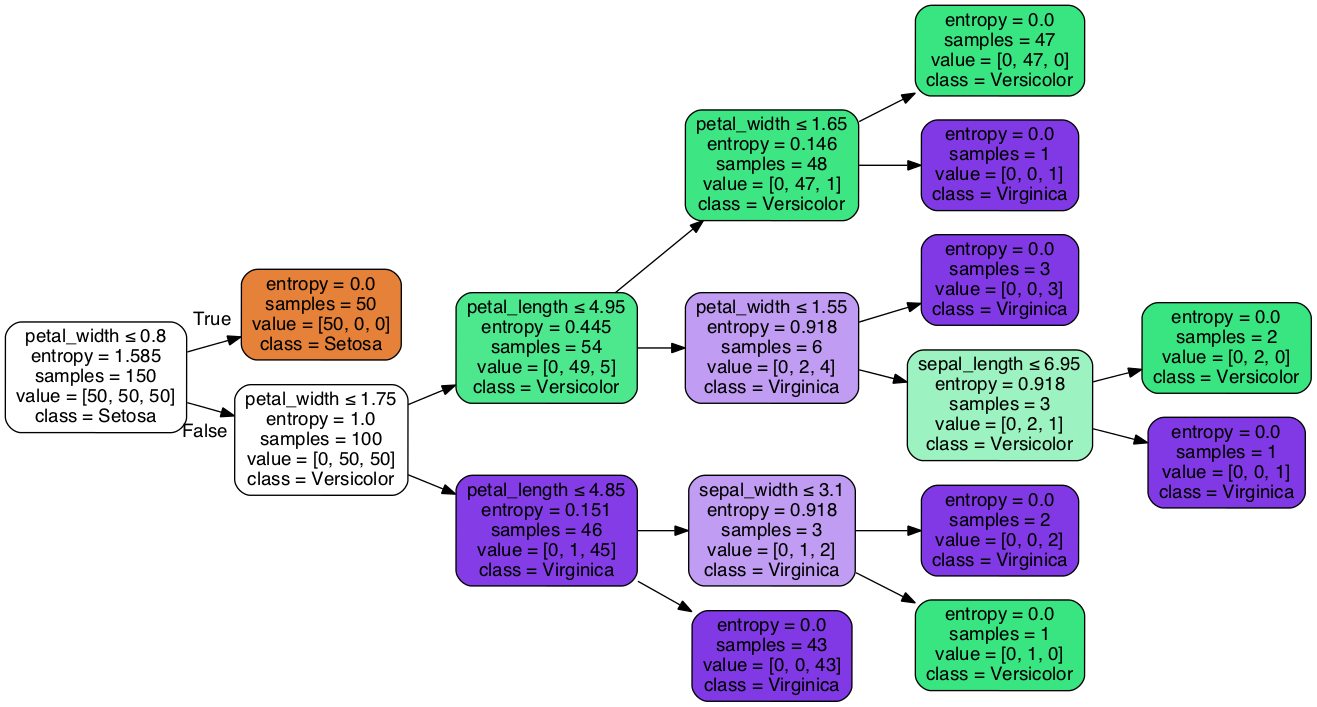

In [24]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,
                    feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                    class_names = ['Setosa', 'Versicolor', 'Virginica'],
                    filled=True, rounded=True, special_characters=True,
                    rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())